This report will carry out a Random walk trading strategy on Seagate technology plc (STX). The data are collected from yfinance.


Random walk trading strategy is desiged to make trading decision baased on the assumption that asset price move randomly and cannot be predicted. The idea is based on the efficient market hypothesis theory(EHM), which suggest that all avaible information is reflected in asset price. According to the model, price changes occur randomly and independently of past movements. The randomness makes it challenging for invest to identify predictable patterns or trends in asset prices.
    
Since the one of the key assumption of this project is that the market is semi-strong market efficiency which the share prices fully and fairly reflect all publicly available information in addition to all past inforamtion. The Martingale Property of asset prices states that: $E[p_{t+1}\mid\Omega_{t}]=p_[t]$. Where $p_[t]$ denotes the price in period t and $\Omega_[t]$ comprises all available information. All the inforamtion available as of date t is encapsulated in p_[t] alone. Therefore, tomorrow price can be estimated by today's price since $E[p_{t+1}-p_{t}\mid\Omega_{t}]=0$




In [152]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np

pio.renderers.default = 'vscode'
pio.templates.default = 'plotly'

symbol = "STX"
start_date = '2021-10-01'
end_date = '2023-10-01'
data = yf.download(symbol, start=start_date, end=end_date)

in_sample_data = data['2021-10-01':'2022-10-01'].copy()
out_sample_data = data['2022-10-02':'2023-10-01'].copy()

fig = px.line(data.reset_index(), x='Date', y='Close', title='Interactive STX Daily Price', markers=True)
fig.update_layout(xaxis_title='Date', yaxis_title='Price ($)')
fig.show()


[*********************100%%**********************]  1 of 1 completed

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



The returns is calculate by: $$R_{i}=\frac{S_{i+1} - S_{i}}{S_{1}}$$
Sample Mean:  $$\overline{R}= \frac{1}{M}\sum_{i=1}^{M}R_{i}$$
Sample Standard Deviation: $$\sigma_{i}=\sqrt{\frac{1}{M-1}\sum_{i=1}^{M}(R_{i} - \overline{R})^2}$$
foundational model for asset return: $$R_{i} = \frac{S_{i+1}-S_{i}}{S_{i}} = mean + standard\space deviation * \varphi$$

Since $\delta_ t$ can be infinitely small, the standard deviation of assets returns can be rewrite as:$standard \space deviation = \sigma\delta t^{\frac{1}{2}}$. Combining drift and randomness into the foundation of asset returns formula $$R_{i} = \frac{S_{i+1}-S_{i}}{S_{i}} = \mu\delta t + \sigma\varphi\delta t^{\frac{1}{2}}$$ or $$S_{i+1} - S_{i} = S_{i}\mu\delta t + S_{i}\sigma\varphi\delta t^{\frac{1}{2}}$$


This is the foundation of asset return. The following part demonstrated asset return in random path.

Test for randomnese will be the first step of this project. The test will focus on the markov property and the martingale property.
##
- The Markov property:
    - If there is no memory beyond the present 
    - no economic profits by trading on technical analysis. 
##
- The Martingale property:
    - Without a change to our information set, the best estimate of future price is today’s price    
    - Therefore, no profits from fundamental analysis 

Therefore,
##
$ H_0 : $ Data process is random  

$ H_1 : $ Data process is not random 

In [153]:
es_symbol = "STX"
es_start_date = '2015-10-01'
es_end_date = '2023-10-01'
es_data = yf.download(symbol, start=start_date, end=end_date)
ES = es_data
ES.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-25,65.000000,65.190002,63.900002,64.449997,64.449997,1827600
2023-09-26,64.199997,65.330002,63.320000,63.419998,63.419998,2065600
2023-09-27,63.990002,65.099998,63.880001,64.290001,64.290001,1557000
2023-09-28,64.099998,65.930000,63.880001,65.690002,65.690002,2210100
2023-09-29,66.209999,66.320000,65.430000,65.949997,65.949997,2034700


In [154]:
ES.describe()

,Open,High,Low,Close,Adj Close,Volume
count,502.000000,502.000000,502.000000,502.000000,502.000000,5.020000e+02
mean,74.373506,75.599980,73.215020,74.433944,70.635699,2.353565e+06
std,17.864442,18.182042,17.552391,17.819785,15.502337,1.357752e+06
min,48.740002,49.080002,47.470001,48.490002,46.273327,7.532000e+05
25%,60.630000,61.727501,60.035001,60.905000,59.600458,1.603650e+06
50%,68.000000,69.474998,66.860001,68.639999,66.392200,2.046450e+06
75%,84.805000,86.270000,83.040003,84.512497,78.925508,2.633350e+06
max,115.970001,117.669998,114.300003,116.019997,107.591957,1.194440e+07


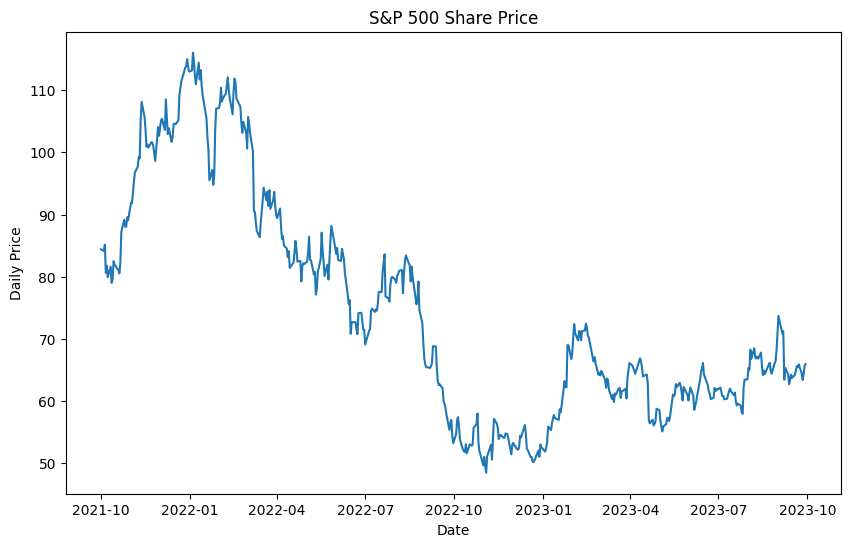

In [155]:
plt.figure(figsize=(10,6))
plt.plot(ES.Close)
plt.xlabel("Date")
plt.ylabel("Daily Price")
plt.title("S&P 500 Share Price")
plt.show()

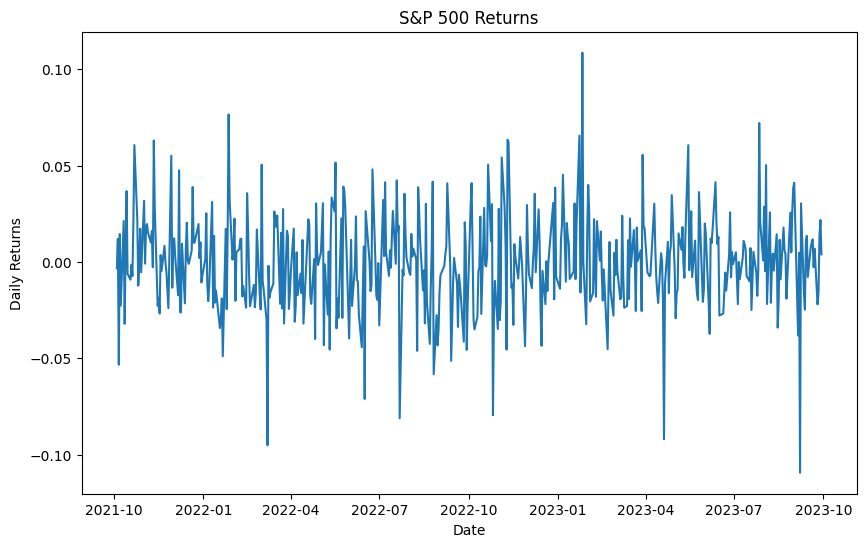

In [156]:
ES['ret'] = ES.Close.pct_change().dropna()

plt.figure(figsize=(10,6))
plt.plot(ES.ret)
plt.xlabel("Date")
plt.ylabel("Daily Returns")
plt.title("S&P 500 Returns")
plt.show()

In [157]:
from statsmodels.sandbox.stats.runs import runstest_1samp 

runstest_1samp(ES.ret[1:], correction=True)

(-0.6603397139805725, 0.5090358499444911)

Since the p-values is larger than 0.05,$H_{0}$ can not be rejected. This mean the data follows a random process.

The foundation concept of modelling a random walk trading strategy is the Brownian motion theory. Brownian motion is a stochastic process characterized by random movements of particles. The movement of a particle in Brownian motion is independent of its past movements which the expected value of the random variable $S_{i-1}$ conditional on all past events only depends on the previous value $S_{i-1}$. This pattern also known as Markov property. To apply Brownian motion, Stochastic processes are used as mathematical models of systems that appear to vary in a random manner. The collection of random variables will represented as $W_{t}$ in this project.In addition, this project apply stochastic calculus to the mathematical modelling of financial processes. Eventually, the stochastc models will be able to develop a random walk model furthe into continuous time.

In a single path of Brownian motion, asset will drift either upward or downward following a distribution of returns. The range will be one standard deviation above and below the mean.

A stochastic process $ 𝑊_𝑡 $  for $ 𝑡∈[0,∞] $, is a standard Weiner Process (Brownian motion) provided:

1. It starts at zero: $ 𝑊_0=0 $
2. $ 𝑊_𝑡 $ is a continuous function of $ t $ with no jumps
3. $ 𝑊 $ has independent increments — for any time $ 𝑡_1<𝑡_2<𝑡_3<𝑡_4 $, the increment $ 𝑊_{𝑡4}−𝑊_{𝑡3} $ is independent of the increment $ 𝑊_{𝑡2}−𝑊_{𝑡1} $
4. For any $ 𝑡_1>0 $, every increment $ 𝑊_𝑡 $  is normally distributed with mean $ 0 $ and variance $ t $
5. $ 𝑑𝑊_𝑡 $ is from normal distribution;
6. the mean of $ 𝑑𝑊_𝑡=0 $, i.e., $ 𝐸(𝑑𝑊_𝑡)=0 $,
7. the variance is $ 𝑑𝑡 $, i.e., $ 𝑑𝑊_𝑡:= 𝑑𝑡^{(1/2)}∙𝑍 $, where $ 𝑍 $ is normally distributed with mean equal to $ 0 $ and variance $ 1 $;~ 
##
where $dW_t$ is from normal distribution;
the mean of $dW_t$ = 0, $E(dW_t)=0$
the variance is $dt$, $dW_t = dt^{\frac{1}{2}}*Z$ , where $Z$ is normally distributed with mean equal to 0 and variance 1

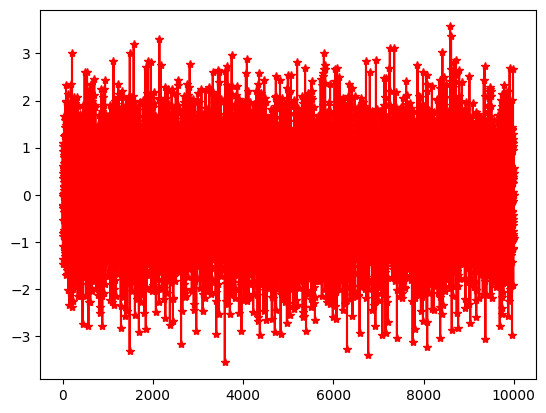

In [158]:
N = 10000
x = np.random.normal(0, 1, N)

plt.plot(x, 'r-*')
plt.show()

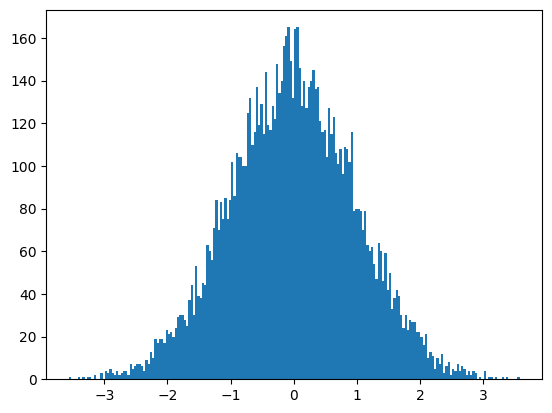

In [159]:
num_bins = 200

plt.hist(x, num_bins)
plt.show()

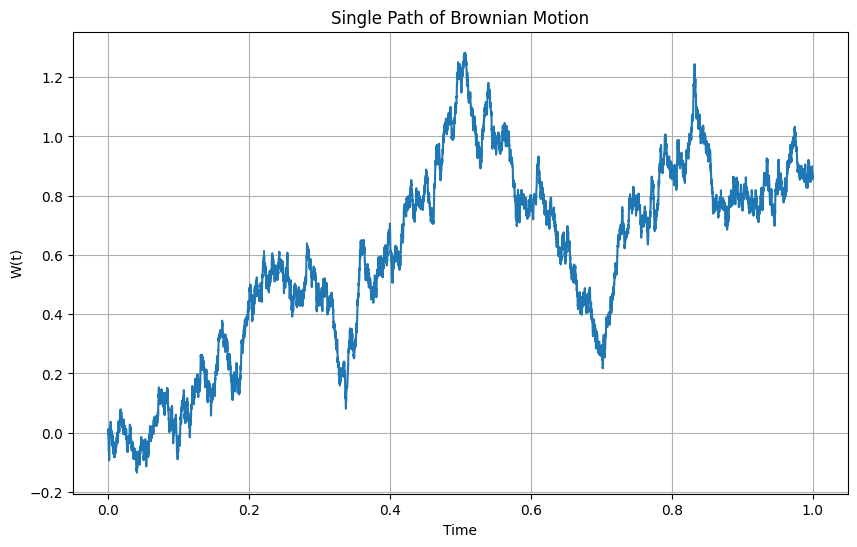

In [160]:
T = 1  
N = 10000  
dt = T/N
t = np.linspace(0, T, N)

dW = np.sqrt(dt) * np.random.randn(N)

W = np.cumsum(dW)

plt.figure(figsize=(10, 6))
plt.grid(True)
plt.plot(t, W)
plt.title("Single Path of Brownian Motion")
plt.xlabel("Time")
plt.ylabel("W(t)")
plt.show()

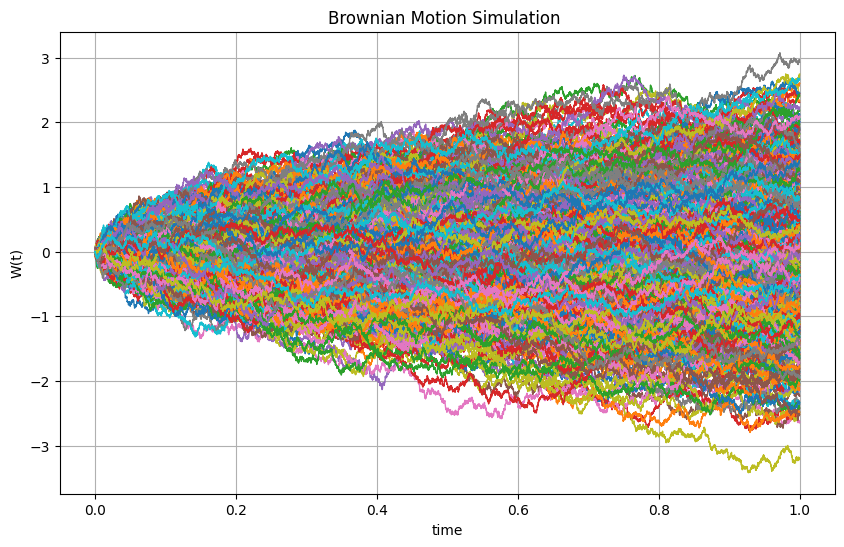

In [161]:
import numpy as np
import matplotlib.pyplot as plt


T = 1  
N = 10000  
dt = T/N
t = np.linspace(0, T, N)
num_paths = 1000

dW = np.sqrt(dt) * np.random.randn(N)

W_paths = np.zeros((N, num_paths))

for i in range(num_paths):
    dW = np.sqrt(dt) * np.random.randn(N)
    W_paths[:, i] = np.cumsum(dW)
    

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(t, W_paths, linewidth = 1)
ax.set_title('Brownian Motion Simulation ')
ax.grid(True)
plt.ylabel('W(t)')
plt.xlabel('time')
plt.show()


However, Brownian motion is not a suitable mode for stock prices since Brownian Motion can result negative while stock price cannot. Therefore, the following part will demonstraed a advanced model called Geometric Brownian motion Process(GBM):$$dS_{t} = \mu S_{t}dt+\sigma S_{t}dW_{t}$$
where $\mu dt$ is a deterministic return; $\mu dW_{t}$ is the random change. $dW_{t}$ is a sample from a normal distribution with mean 0 and variance $dt$. The drift and randomness scale with $S_{t}$.
##
This model nullify the problem of neagtive values and allow for the effect of compounding. Since there are scaling factors, the change of stock price can be calculated in any given time. This stochastic differential equation can be integrated into: $$S_{t}=S_{0}e^{(\mu-\frac{1}{2}\sigma^{2}t+\sigma(W_{t}-W_{0}))}$$
##
In other words, Geometric Brownian Motion is a series of random walk process continually through time. The stock price will drift to the normal distribution depends on randomness for each continuous time.
##
The difference between Brownian Motion(BM) and Geometric Brownian Motion(GBM) is that BM is characterized by continous but non-differentiable paths, random and independent increments, and normally distributed increments over time while GBM includes drift and volatility terms which representing the expected return or gowth rate and the standard deviation of returns.

A Geometric Brownian Motion appoach on Seagate technology plc(STx)

In [162]:
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Estimating daily returns
daily_returns = in_sample_data['Close'].pct_change().dropna()

#Estimate Drift(mu)
returns = np.log(data['Close'] / data['Close'].shift(1))
mu = returns.mean()
# Scale returns by 100
scaled_returns = returns * 100

# Fit the GARCH model
model = arch_model(scaled_returns.dropna(), vol='Garch', p=1, q=1)
results = model.fit(disp='off')

print(results.summary())

# When extracting volatility, remember to adjust for the scale factor
sigma = np.sqrt(results.params['omega'] / (1 - results.params['alpha[1]'] - results.params['beta[1]'])) / 100

print("Estimated volatility (σ) from GARCH:", sigma)

# Make a one-step ahead forecast and explicitly set reindex to True
forecasts = results.forecast(horizon=1, reindex=True)
forecasted_volatility = np.sqrt(forecasts.variance.iloc[-1, 0]) / 100

print("One-step ahead forecasted volatility:", forecasted_volatility)

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1175.82
Distribution:                  Normal   AIC:                           2359.63
Method:            Maximum Likelihood   BIC:                           2376.50
                                        No. Observations:                  501
Date:                Fri, Dec 01 2023   Df Residuals:                      500
Time:                        00:30:42   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0493      0.113     -0.436      0.663 [ -0.271,  0.17

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:1890: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:1891: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:1892: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.i

Since drift($\mu$) and volatility($\sigma$) are important in Geometric Brownian Motion. This two value are estimated by sample mean and GRACH model representatively.
##

To fit a GARCH model to the daily returns to model the time-varying volatility. $\sigma$ from a GARCH regression. the following expression is used:


$$ \sigma = \sqrt{(\omega/(1-\alpha-\beta)} $$

Where:
- $\omega$ is the constant term.
- $\alpha$ is the coefficient(s) for past squared returns, representing the ARCH effect.
- $\beta$ is the coefficient(s) for past conditional variances, representing the GARCH effect.

Then, Extract the long-term average volatility $\sigma$ from the GARCH model.

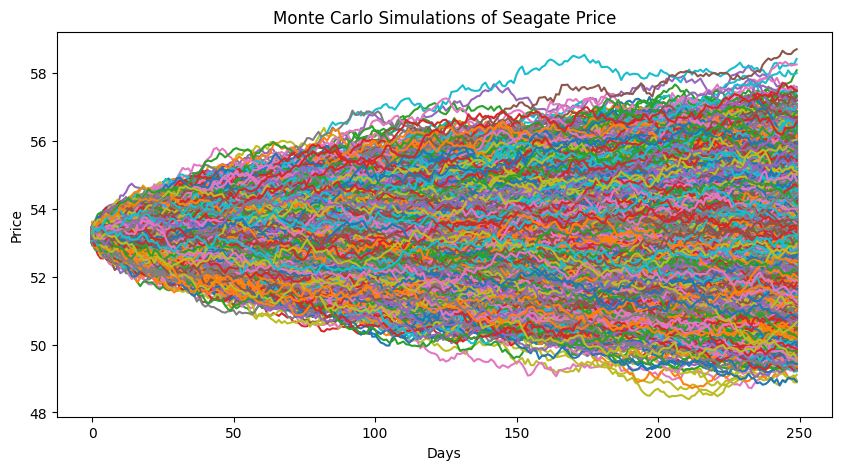

In [163]:
num_days = len(out_sample_data)
num_simulations = 10000
dt = 1 / num_days
S_0 = in_sample_data['Close'].iloc[-1]
t = np.arange(1, num_days + 1) * dt
simulated_paths = np.zeros((num_days, num_simulations))

# Simulating paths using the GBM formula
for i in range(num_simulations):
    dW = np.sqrt(dt) * np.random.randn(num_days)
    W_temp = np.cumsum(dW)
    simulated_paths[:, i] = S_0 * np.exp((mu - 0.5 * forecasted_volatility ** 2) * t + forecasted_volatility * W_temp)

# Monte Carlo plot
plt.figure(figsize=(10, 5))
plt.plot(simulated_paths)
plt.title('Monte Carlo Simulations of Seagate Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

This is 10000 simulations for 730 days ahead with daily observational frequency.

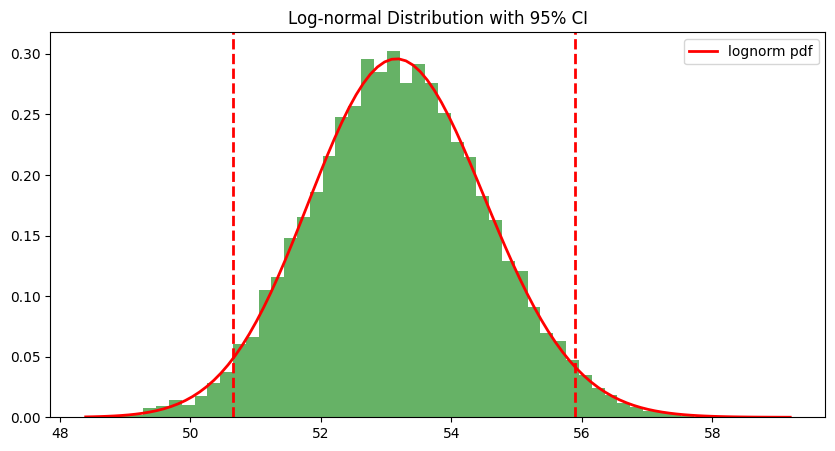

In [164]:
lognormal_mean = np.mean(simulated_paths, axis=1)
confidence_interval = 0.95
lower_bound = np.percentile(simulated_paths, (1 - confidence_interval) / 2 * 100, axis=1)
upper_bound = np.percentile(simulated_paths, (1 + confidence_interval) / 2 * 100, axis=1)

# Plotting the Log-normal Distribution with 95% CI
plt.figure(figsize=(10, 5))
final_prices = simulated_paths[-1, :]
plt.hist(final_prices, bins=50, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# Overlaying the theoretical log-normal distribution
from scipy.stats import lognorm
shape, loc, scale = lognorm.fit(final_prices, floc=0)
pdf = lognorm.pdf(x, shape, loc=loc, scale=scale)
plt.plot(x, pdf, 'r-', lw=2, label='lognorm pdf')

p = np.percentile(final_prices, [(1-confidence_interval) / 2 * 100, (1+confidence_interval) / 2 * 100])
plt.axvline(p[0], color='red', linestyle='dashed', linewidth=2)
plt.axvline(p[1], color='red', linestyle='dashed', linewidth=2)
plt.title('Log-normal Distribution with 95% CI')
plt.legend()
plt.show()

The log-normal distribution of the Monte Carlo forecast at 252nd day

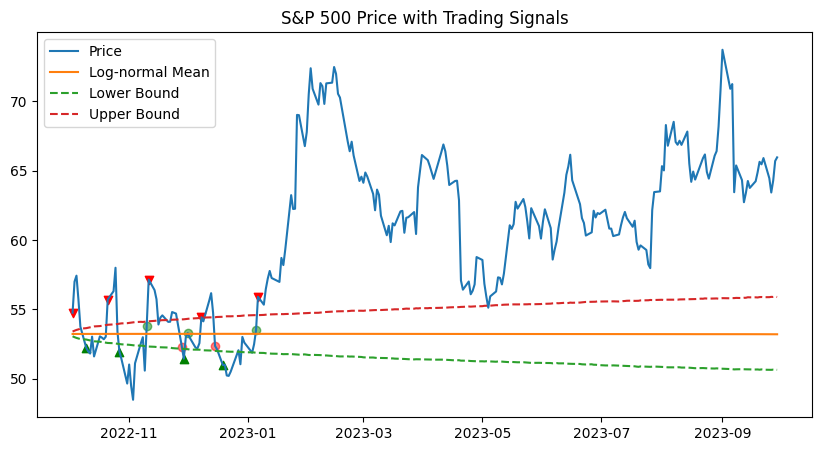

In [165]:
# Implementing the trading strategy
out_sample_data['lognormal_mean'] = lognormal_mean
out_sample_data['lower_bound'] = lower_bound
out_sample_data['upper_bound'] = upper_bound
out_sample_data['position'] = 0
out_sample_data['signal'] = None
position = 0
for i in range(len(out_sample_data)):
    date = out_sample_data.index[i]
    close_price = out_sample_data.at[date, 'Close']
    if close_price > upper_bound[i] and position != -1:
        position = -1
        out_sample_data.at[date, 'signal'] = 'sell'
    elif close_price < lower_bound[i] and position != 1:
        position = 1
        out_sample_data.at[date, 'signal'] = 'buy'
    elif close_price < lognormal_mean[i] and position == -1:
        position = 0
        out_sample_data.at[date, 'signal'] = 'exit_sell'
    elif close_price > lognormal_mean[i] and position == 1:
        position = 0
        out_sample_data.at[date, 'signal'] = 'exit_buy'
    out_sample_data.at[date, 'position'] = position

# Price, Log-normal mean, Confidence intervals and trading signals
plt.figure(figsize=(10, 5))
plt.plot(out_sample_data['Close'], label='Price')
plt.plot(out_sample_data['lognormal_mean'], label='Log-normal Mean')
plt.plot(out_sample_data['lower_bound'], label='Lower Bound', linestyle='--')
plt.plot(out_sample_data['upper_bound'], label='Upper Bound', linestyle='--')

# Adding buy/sell signals
for i in range(len(out_sample_data)):
    date = out_sample_data.index[i]
    if out_sample_data.at[date, 'signal'] == 'buy':
        plt.scatter(date, out_sample_data.at[date, 'Close'], marker='^', color='g')
    elif out_sample_data.at[date, 'signal'] == 'sell':
        plt.scatter(date, out_sample_data.at[date, 'Close'], marker='v', color='r')
    elif out_sample_data.at[date, 'signal'] == 'exit_buy':
        plt.scatter(date, out_sample_data.at[date, 'Close'], marker='o', color='g', alpha=0.5)
    elif out_sample_data.at[date, 'signal'] == 'exit_sell':
        plt.scatter(date, out_sample_data.at[date, 'Close'], marker='o', color='r', alpha=0.5)

plt.legend()
plt.title('S&P 500 Price with Trading Signals')
plt.show()

Implement trading strategy using conditional statements. Include signal and exit conditions. 
Plot MC implied lognormal confidence intervals, lognormal mean and actual out-of-sample closing prices for SP500 on the same plot. 

Since the lognormal confidence level is 95%.$$Buy:Ask\space price < 2.5\space percentile, Exit\space when\space price > log - normal\space mean$$ $$Sell:Bid\space price > 97.5\space percentile, Exit\space when\space price < log - normal\space mean$$

The upper and lower bound represent to the degree of certainty which determine trading actions. Furthermore, investors could calculate the risk. In this case, for buy and hold strategy, there are 97.5% certainty that the value of trad will not drop below $50.01

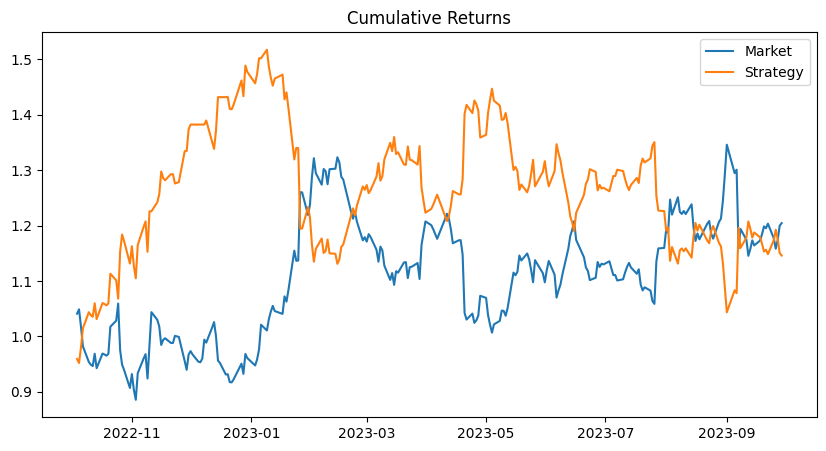

In [166]:
out_sample_data['daily_returns'] = out_sample_data['Close'].pct_change()
out_sample_data['strategy_returns'] = out_sample_data['daily_returns'] * out_sample_data['position'].shift(1)

# Calculating cumulative returns
out_sample_data['cumulative_market_returns'] = (1 + out_sample_data['daily_returns']).cumprod()
out_sample_data['cumulative_strategy_returns'] = (1 + out_sample_data['strategy_returns']).cumprod()

# Cumulative returns plot
plt.figure(figsize=(10, 5))
plt.plot(out_sample_data['cumulative_market_returns'], label='Market')
plt.plot(out_sample_data['cumulative_strategy_returns'], label='Strategy')
plt.legend()
plt.title('Cumulative Returns')
plt.show()

Calculate out-of-sample returns for the buy & hold strategy and mean reversion random walk strategy.
Sum these returns to calculate the cumulative returns on each strategy and plot to visualise. 

In [167]:
def calculate_sma(data, column='Close', period=50):
    return data[column].rolling(window=period).mean()

out_sample_data['SMA_short'] = calculate_sma(out_sample_data, 'Close', 10)
out_sample_data['SMA_long'] = calculate_sma(out_sample_data, 'Close', 20)
out_sample_data

,Open,High,Low,Close,Adj Close,Volume,lognormal_mean,lower_bound,upper_bound,position,signal,daily_returns,strategy_returns,cumulative_market_returns,cumulative_strategy_returns,SMA_short,SMA_long
Date,,,,,,,,,,,,,,,,,
2022-10-03,53.570000,55.630001,53.570000,54.759998,52.256695,4374100,53.231323,53.064386,53.402044,-1,sell,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-04,55.770000,57.560001,55.689999,57.000000,54.394295,4755700,53.231063,52.998448,53.466308,-1,None,0.040906,-0.040906,1.040906,0.959094,NaN,NaN
2022-10-05,55.869999,57.759998,55.220001,57.430000,54.804642,2745200,53.231785,52.945079,53.519784,-1,None,0.007544,-0.007544,1.048758,0.951859,NaN,NaN
2022-10-06,56.880001,57.110001,54.590000,55.709999,53.163265,3313400,53.231236,52.904324,53.560687,-1,None,-0.029950,0.029950,1.017348,0.980367,NaN,NaN
2022-10-07,54.470001,55.990002,53.230000,53.759998,51.302410,2926300,53.232390,52.862642,53.610096,-1,None,-0.035003,0.035003,0.981738,1.014682,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-25,65.000000,65.190002,63.900002,64.449997,64.449997,1827600,53.209926,50.650550,55.881416,-1,None,-0.022003,0.022003,1.176954,1.173633,64.464,66.2505
2023-09-26,64.199997,65.330002,63.320000,63.419998,63.419998,2065600,53.210490,50.646579,55.902576,-1,None,-0.015981,0.015981,1.158145,1.192390,64.534,66.1180
2023-09-27,63.990002,65.099998,63.880001,64.290001,64.290001,1557000,53.208991,50.661145,55.897410,-1,None,0.013718,-0.013718,1.174032,1.176032,64.624,66.0125


In [168]:
out_sample_data['gamma'] = (out_sample_data['SMA_short'] - out_sample_data['SMA_long']) / out_sample_data['SMA_long']
out_sample_data

,Open,High,Low,Close,Adj Close,Volume,lognormal_mean,lower_bound,upper_bound,position,signal,daily_returns,strategy_returns,cumulative_market_returns,cumulative_strategy_returns,SMA_short,SMA_long,gamma
Date,,,,,,,,,,,,,,,,,,
2022-10-03,53.570000,55.630001,53.570000,54.759998,52.256695,4374100,53.231323,53.064386,53.402044,-1,sell,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-04,55.770000,57.560001,55.689999,57.000000,54.394295,4755700,53.231063,52.998448,53.466308,-1,None,0.040906,-0.040906,1.040906,0.959094,NaN,NaN,NaN
2022-10-05,55.869999,57.759998,55.220001,57.430000,54.804642,2745200,53.231785,52.945079,53.519784,-1,None,0.007544,-0.007544,1.048758,0.951859,NaN,NaN,NaN
2022-10-06,56.880001,57.110001,54.590000,55.709999,53.163265,3313400,53.231236,52.904324,53.560687,-1,None,-0.029950,0.029950,1.017348,0.980367,NaN,NaN,NaN
2022-10-07,54.470001,55.990002,53.230000,53.759998,51.302410,2926300,53.232390,52.862642,53.610096,-1,None,-0.035003,0.035003,0.981738,1.014682,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-25,65.000000,65.190002,63.900002,64.449997,64.449997,1827600,53.209926,50.650550,55.881416,-1,None,-0.022003,0.022003,1.176954,1.173633,64.464,66.2505,-0.026966
2023-09-26,64.199997,65.330002,63.320000,63.419998,63.419998,2065600,53.210490,50.646579,55.902576,-1,None,-0.015981,0.015981,1.158145,1.192390,64.534,66.1180,-0.023957
2023-09-27,63.990002,65.099998,63.880001,64.290001,64.290001,1557000,53.208991,50.661145,55.897410,-1,None,0.013718,-0.013718,1.174032,1.176032,64.624,66.0125,-0.021034


In [169]:
delta = 0.005  # Adjust this threshold as needed

def signal_based_on_gamma_switch_and_delta(out_sample_data, delta):
    signals = ['Hold']  # Default to 'Hold' for the first data point

    for i in range(1, len(out_sample_data)):
        if out_sample_data['gamma'].iloc[i] > delta and out_sample_data['gamma'].iloc[i-1] <= delta:
            signals.append('Buy')
        elif out_sample_data['gamma'].iloc[i] < -delta and out_sample_data['gamma'].iloc[i-1] >= -delta:
            signals.append('Sell')
        else:
            signals.append('Hold')
    
    return signals

out_sample_data['signal'] = signal_based_on_gamma_switch_and_delta(out_sample_data, delta)
out_sample_data

,Open,High,Low,Close,Adj Close,Volume,lognormal_mean,lower_bound,upper_bound,position,signal,daily_returns,strategy_returns,cumulative_market_returns,cumulative_strategy_returns,SMA_short,SMA_long,gamma
Date,,,,,,,,,,,,,,,,,,
2022-10-03,53.570000,55.630001,53.570000,54.759998,52.256695,4374100,53.231323,53.064386,53.402044,-1,Hold,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-04,55.770000,57.560001,55.689999,57.000000,54.394295,4755700,53.231063,52.998448,53.466308,-1,Hold,0.040906,-0.040906,1.040906,0.959094,NaN,NaN,NaN
2022-10-05,55.869999,57.759998,55.220001,57.430000,54.804642,2745200,53.231785,52.945079,53.519784,-1,Hold,0.007544,-0.007544,1.048758,0.951859,NaN,NaN,NaN
2022-10-06,56.880001,57.110001,54.590000,55.709999,53.163265,3313400,53.231236,52.904324,53.560687,-1,Hold,-0.029950,0.029950,1.017348,0.980367,NaN,NaN,NaN
2022-10-07,54.470001,55.990002,53.230000,53.759998,51.302410,2926300,53.232390,52.862642,53.610096,-1,Hold,-0.035003,0.035003,0.981738,1.014682,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-25,65.000000,65.190002,63.900002,64.449997,64.449997,1827600,53.209926,50.650550,55.881416,-1,Hold,-0.022003,0.022003,1.176954,1.173633,64.464,66.2505,-0.026966
2023-09-26,64.199997,65.330002,63.320000,63.419998,63.419998,2065600,53.210490,50.646579,55.902576,-1,Hold,-0.015981,0.015981,1.158145,1.192390,64.534,66.1180,-0.023957
2023-09-27,63.990002,65.099998,63.880001,64.290001,64.290001,1557000,53.208991,50.661145,55.897410,-1,Hold,0.013718,-0.013718,1.174032,1.176032,64.624,66.0125,-0.021034


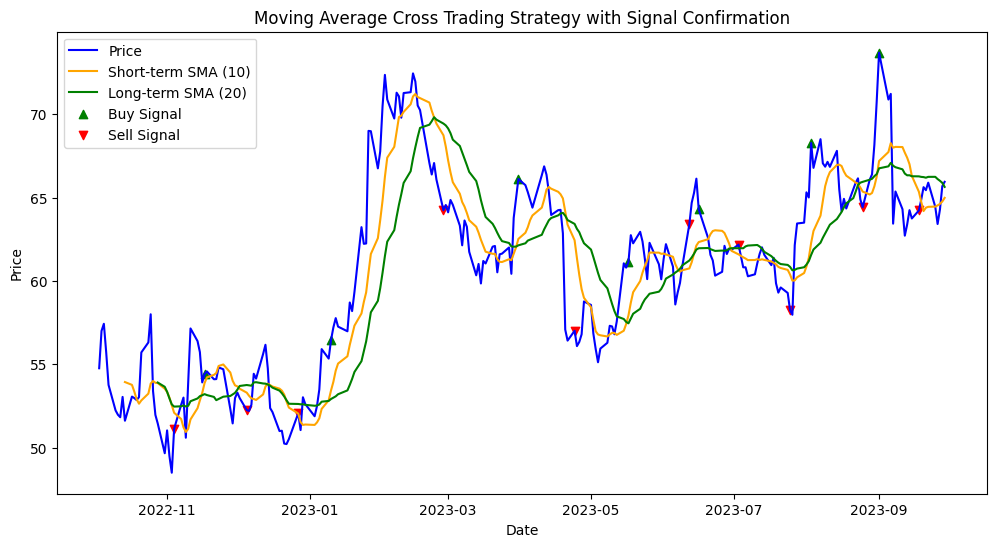

In [170]:
plt.figure(figsize=(12, 6))

# Plot the price
plt.plot(out_sample_data['Close'], label='Price', color='blue')

# Plot Short-term and Long-term SMAs
plt.plot(out_sample_data['SMA_short'], label='Short-term SMA (10)', color='orange')
plt.plot(out_sample_data['SMA_long'], label='Long-term SMA (20)', color='green')

# Highlight Buy and Sell Signals
buy_signals = out_sample_data[out_sample_data['signal'] == 'Buy']
sell_signals = out_sample_data[out_sample_data['signal'] == 'Sell']

plt.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='green', label='Buy Signal', alpha=1)
plt.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='red', label='Sell Signal', alpha=1)

# Add titles and labels
plt.title('Moving Average Cross Trading Strategy with Signal Confirmation')
plt.xlabel('Date')
plt.ylabel('Price')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [171]:
# Create a column for Position based on signals
out_sample_data['position'] = out_sample_data['signal'].map({'Buy': 1, 'Sell': -1, 'Hold': 0})

# Calculate Daily Returns
# Note: 'pct_change()' calculates the percentage change from the immediately previous row by default
out_sample_data['daily_return'] = out_sample_data['Close'].pct_change()

# Calculate Strategy Returns
# Strategy return is product of daily return and position
out_sample_data['strategy_return'] = out_sample_data['daily_return'] * out_sample_data['position']

# Calculate Cumulative Returns
# 'cumsum()' gives the cumulative sum of strategy returns
out_sample_data['cumulative_return'] = out_sample_data['strategy_return'].cumsum()

# Scale by Initial Portfolio Size
# If initial portfolio size is 1, then the cumulative returns directly represent its growth
out_sample_data['portfolio_value'] = 1 + out_sample_data['cumulative_return']

# Display the DataFrame
out_sample_data

,Open,High,Low,Close,Adj Close,Volume,lognormal_mean,lower_bound,upper_bound,position,...,strategy_returns,cumulative_market_returns,cumulative_strategy_returns,SMA_short,SMA_long,gamma,daily_return,strategy_return,cumulative_return,portfolio_value
Date,,,,,,,,,,,,,,,,,,,,,
2022-10-03,53.570000,55.630001,53.570000,54.759998,52.256695,4374100,53.231323,53.064386,53.402044,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-04,55.770000,57.560001,55.689999,57.000000,54.394295,4755700,53.231063,52.998448,53.466308,0,...,-0.040906,1.040906,0.959094,NaN,NaN,NaN,0.040906,0.0,0.000000,1.000000
2022-10-05,55.869999,57.759998,55.220001,57.430000,54.804642,2745200,53.231785,52.945079,53.519784,0,...,-0.007544,1.048758,0.951859,NaN,NaN,NaN,0.007544,0.0,0.000000,1.000000
2022-10-06,56.880001,57.110001,54.590000,55.709999,53.163265,3313400,53.231236,52.904324,53.560687,0,...,0.029950,1.017348,0.980367,NaN,NaN,NaN,-0.029950,-0.0,0.000000,1.000000
2022-10-07,54.470001,55.990002,53.230000,53.759998,51.302410,2926300,53.232390,52.862642,53.610096,0,...,0.035003,0.981738,1.014682,NaN,NaN,NaN,-0.035003,-0.0,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-25,65.000000,65.190002,63.900002,64.449997,64.449997,1827600,53.209926,50.650550,55.881416,0,...,0.022003,1.176954,1.173633,64.464,66.2505,-0.026966,-0.022003,-0.0,0.033302,1.033302
2023-09-26,64.199997,65.330002,63.320000,63.419998,63.419998,2065600,53.210490,50.646579,55.902576,0,...,0.015981,1.158145,1.192390,64.534,66.1180,-0.023957,-0.015981,-0.0,0.033302,1.033302
2023-09-27,63.990002,65.099998,63.880001,64.290001,64.290001,1557000,53.208991,50.661145,55.897410,0,...,-0.013718,1.174032,1.176032,64.624,66.0125,-0.021034,0.013718,0.0,0.033302,1.033302


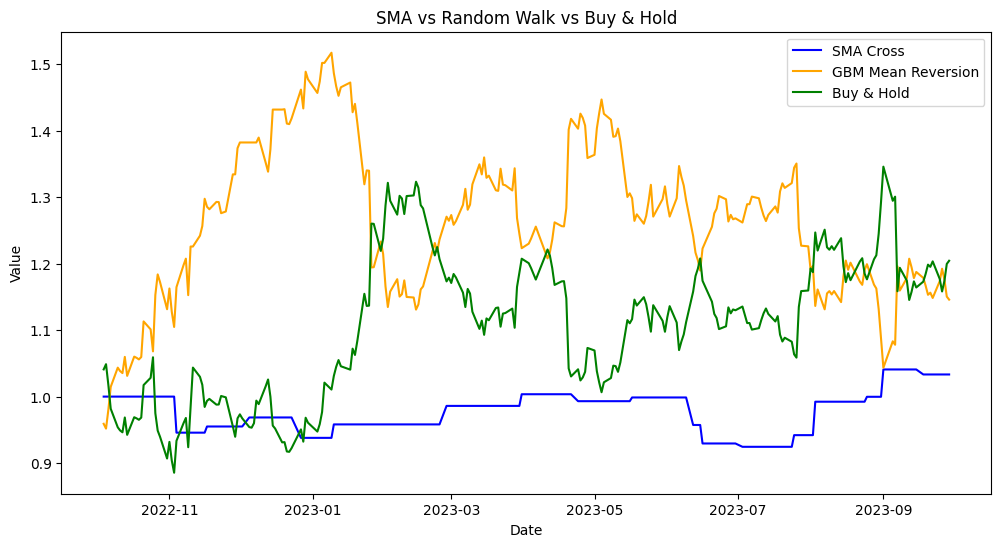

In [172]:
# Plotting
plt.figure(figsize=(12, 6))  # Setting the figure size

# Plot 'portfolio_value' - represents the value of your portfolio over time
plt.plot(out_sample_data['portfolio_value'], label='SMA Cross', color='blue')

# Plot 'cumulative_strategy_returns' - shows the cumulative returns from your trading strategy
plt.plot(out_sample_data['cumulative_strategy_returns'], label='GBM Mean Reversion', color='orange')

# Plot 'cumulative_market_returns' - shows the cumulative returns of the market (or stock)
plt.plot(out_sample_data['cumulative_market_returns'], label='Buy & Hold', color='green')

# Adding titles and labels
plt.title('SMA vs Random Walk vs Buy & Hold')  # Title of the plot
plt.xlabel('Date')  # X-axis label
plt.ylabel('Value')  # Y-axis label

# Add a legend to help identify the lines
plt.legend()

# Display the plot
plt.show()

Random walk are conflict with technical analysis. Since random walk theory advocate future direction of prices are unpredictable using historical observations while technical analysis advocate future direction of prices can be forecasted using historical observations of price, volume and open interest. This againts The Markov property, The Martingale property and Weak form EMH

Nowadays, deep learning technology are developing rapidly and many companies within technical industry started dedicate resources on deep learning technology. This become a trend of modren scoiety and extremely attractive to investors. In addition, The pandemic occurred in 2022 cause huge damage to Seagate. Fortunately, it is covering and inceasing rapidly because of the trend. Therefore, technical analysis are more suitable than random walk trading at the moment. Trend strategies, one of the technical analysis technique which is used wisely in the market. The theory dictates that the market is in a trending regime, if news highs are higher than previous highs and new lows are higher than previous lows. In addition, if the pattern breaks there may be a reversal in the long term trend. Moreover, market may be in a period of consolidation which there are no new high or new lows. Trend strategies can be applied through charting tools. Typically, a touch of trendline will be a buying signal, Revserly, a break of trendline will be a selling signal.

leture 3 page 30, link to Moving average cross
There is a simple filter rules which is trade at the next open if the last closing price $P_{k}$ is different from the former closing prices for a given past period of length n by a certain threshold.$$Buy:\frac{P_{k}}{M_{k}}>1+\delta$$ $$Sell:\frac{P_{k}}{M_{k}}<1-\delta$$
##
where $M_{k} = mas(P_{k-1},..,P_{k-n})$ and $m_{k} = min(P_{k-1},..,P_{k-n})$
##
However, Moving Averages is applied in this project, it follow the same principles of trend strategies. Moviing Averages indicate the direction of a trend by using lagged values over $n$ periods. Smoothing device which is designed to remove the distraction of short term 'noise'

Moving Averages is calculated by:$$SMA_{t,n} = \frac{\sum_{1}^{n}P_{t}}{n}$$
##
Moving average strategies normally use two or more SMA/EMA of different length. When the short-term SMA(S) crosses the long-term SMA(L) this can indicate a change in trend.$$\gamma_{t}=\frac{[SMA(S)-SMA(L)]}{SMA(L)}$$
##
where $\gamma_{t}$ is the relative change to indicate the change in trend.
##
The trading signals is generated by:$$Buy:\gamma_{t}>\delta$$ $$Sell:\gamma_{t}>\delta$$

In [ ]:
def macd_trading_rule(data, stop_loss_percent):
    data['Buy_Signal'] = (data['MACD'] > data['Signal_Line']) & (data['MACD'].shift(1) <= data['Signal_Line'].shift(1))
    data['Sell_Signal'] = (data['MACD'] < data['Signal_Line']) & (data['MACD'].shift(1) >= data['Signal_Line'].shift(1))
    
    # Initialise columns for stop-loss level and signal
    data['Stop_Loss_Level'] = None
    data['Stop_Loss_Signal'] = False
    
    for i in data.index[1:]:
        current_position = data.loc[i]
        previous_position = data.loc[data.index[data.index.get_loc(i) - 1]]  # Correctly getting the previous row
        
        if current_position['Buy_Signal']:
            data.at[i, 'Stop_Loss_Level'] = current_position['Close'] * (1 - stop_loss_percent)
        
        if previous_position['Stop_Loss_Level'] is not None and not previous_position['Sell_Signal']:
            data.at[i, 'Stop_Loss_Level'] = previous_position['Stop_Loss_Level']
        
        if data.at[i, 'Stop_Loss_Level'] is not None and current_position['Close'] <= data.at[i, 'Stop_Loss_Level']:
            data.at[i, 'Stop_Loss_Signal'] = True
            data.at[i, 'Sell_Signal'] = True
            
    
    return data

# Apply the stop-loss logic
stop_loss_percent = 0.01  # For example, 1%
in_sample_data = macd_trading_rule(in_sample_data, stop_loss_percent)
in_sample_data